# ML | Day 10

## Day 10: Campus Recruitment
#### Answer the following based on your analysis of the data (with relevant plots).

### •Which factor most influenced a candidate getting placed?

### •Does percentage matter for one to get placed?

### •Which degree specialization is much demanded by corporate?

### •Preprocess the data and suggest a training algorithm. 

#### #LiveLongAndProsper

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cr= pd.read_csv('https://raw.githubusercontent.com/Fortune-Adekogbe/30-Days-of-ML/master/Day-10/Placement_Data_Full_Class.csv')

In [3]:
cr.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [4]:
cr.keys()

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [13]:
cr.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [14]:
cr.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [16]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [31]:
cr_s = cr.copy()

In [32]:
cr_s['status']=cr_s['status'].replace("Placed", 1)

In [33]:
cr_s['status']=cr_s['status'].replace("Not Placed", 0)

In [34]:
cr_s.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


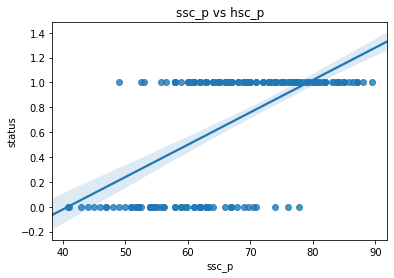

In [36]:
fig = sns.regplot(x="ssc_p", y="status", data=cr_s)
plt.title("ssc_p vs hsc_p")
plt.show()

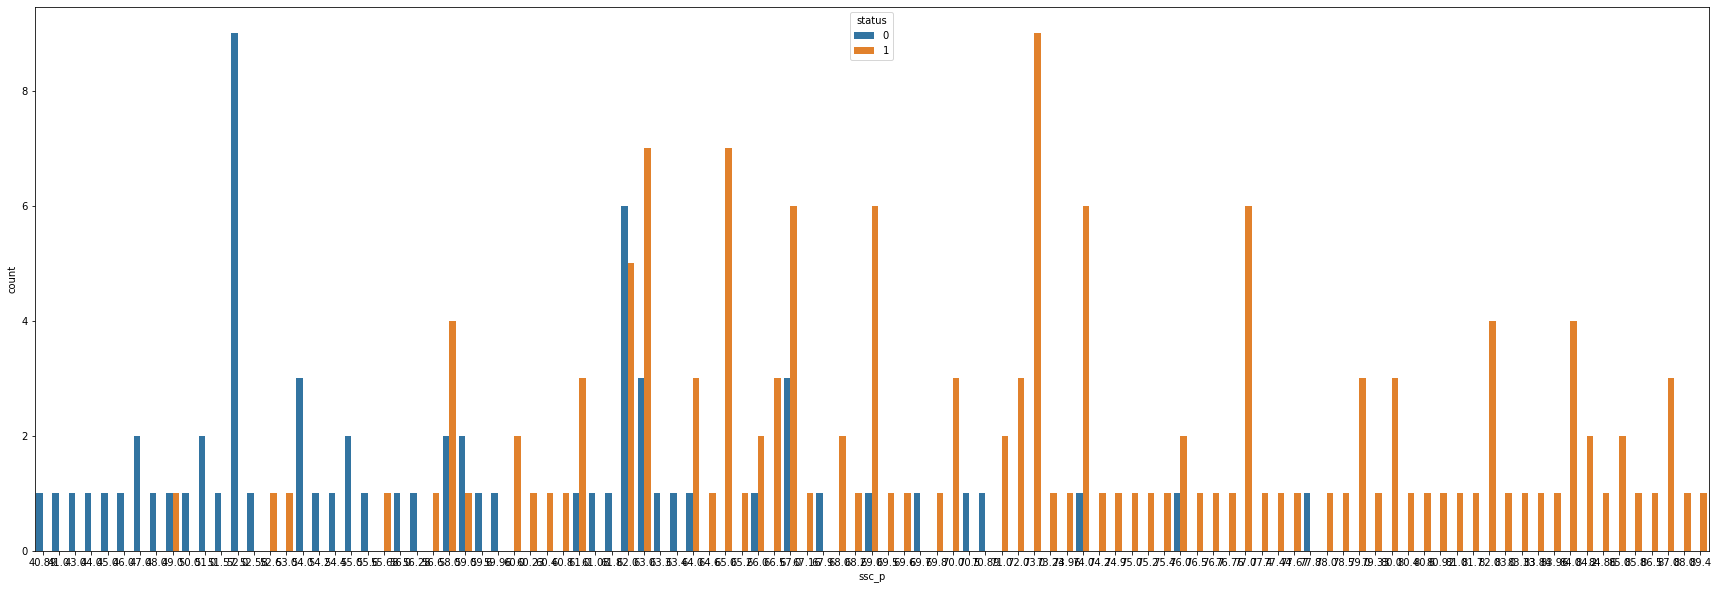

In [43]:
plt.figure(figsize=(30,10))
sns.countplot(x ="ssc_p", data = cr_s, hue ="status")
plt.show()

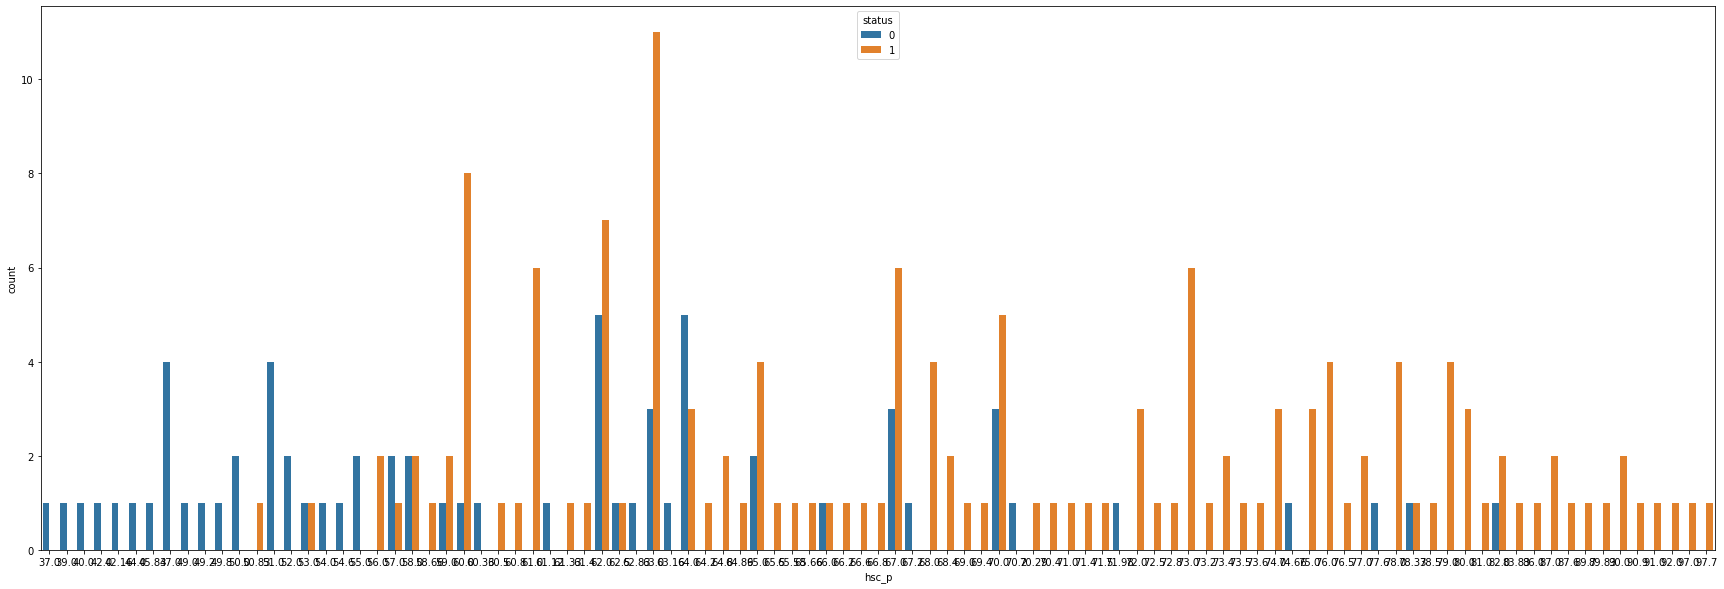

In [44]:
plt.figure(figsize=(30,10))
sns.countplot(x ="hsc_p", data = cr_s, hue ="status")
plt.show()

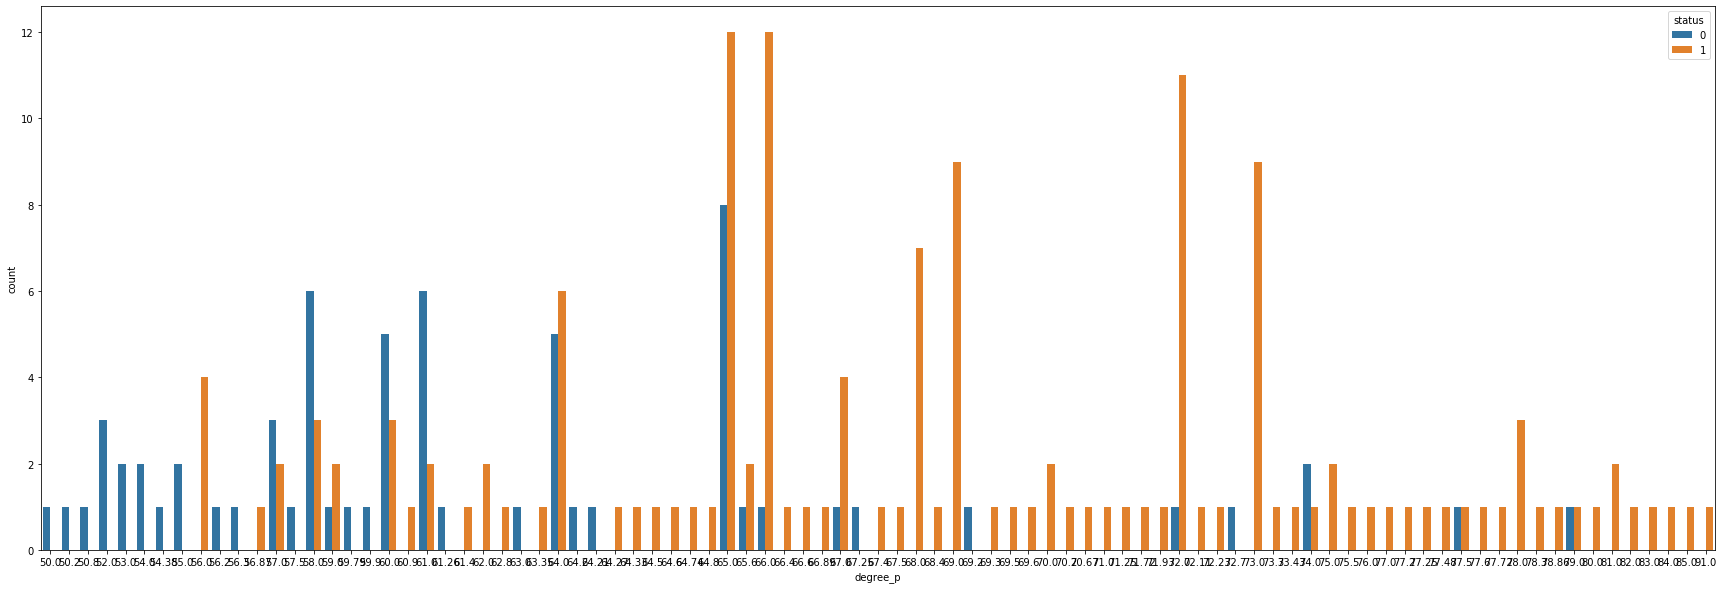

In [47]:
plt.figure(figsize=(30,10))
sns.countplot(x ="degree_p", data = cr_s, hue ="status")
plt.show()

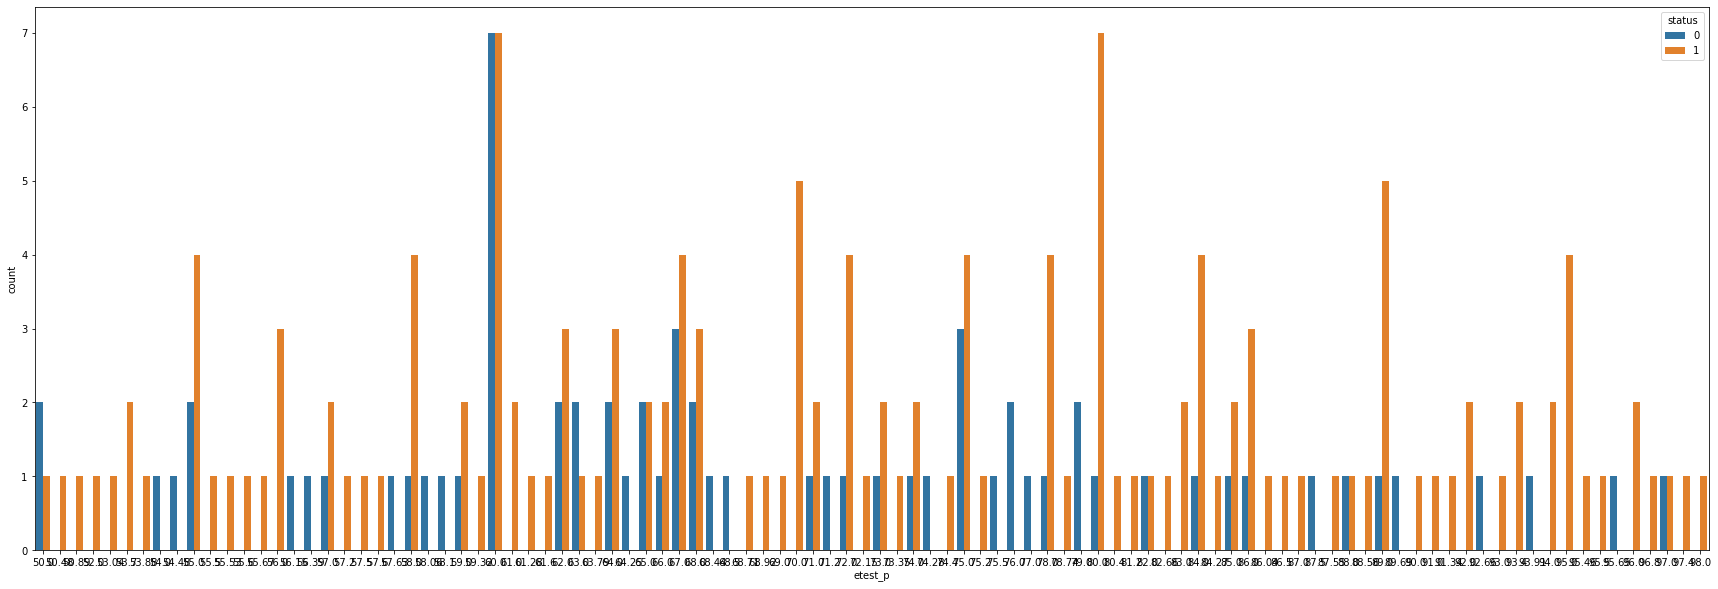

In [48]:
plt.figure(figsize=(30,10))
sns.countplot(x ="etest_p", data = cr_s, hue ="status")
plt.show()

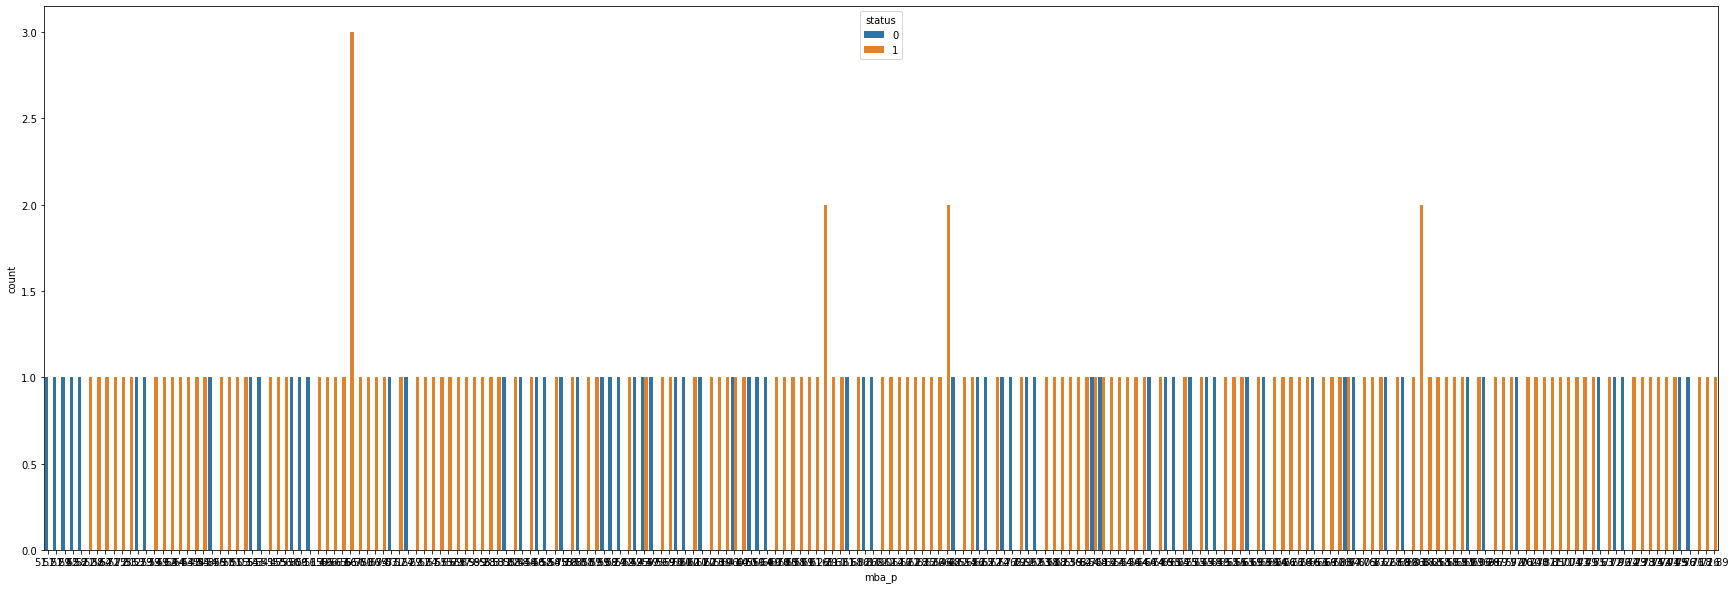

In [49]:
plt.figure(figsize=(30,10))
sns.countplot(x ="mba_p", data = cr_s, hue ="status")
plt.show()

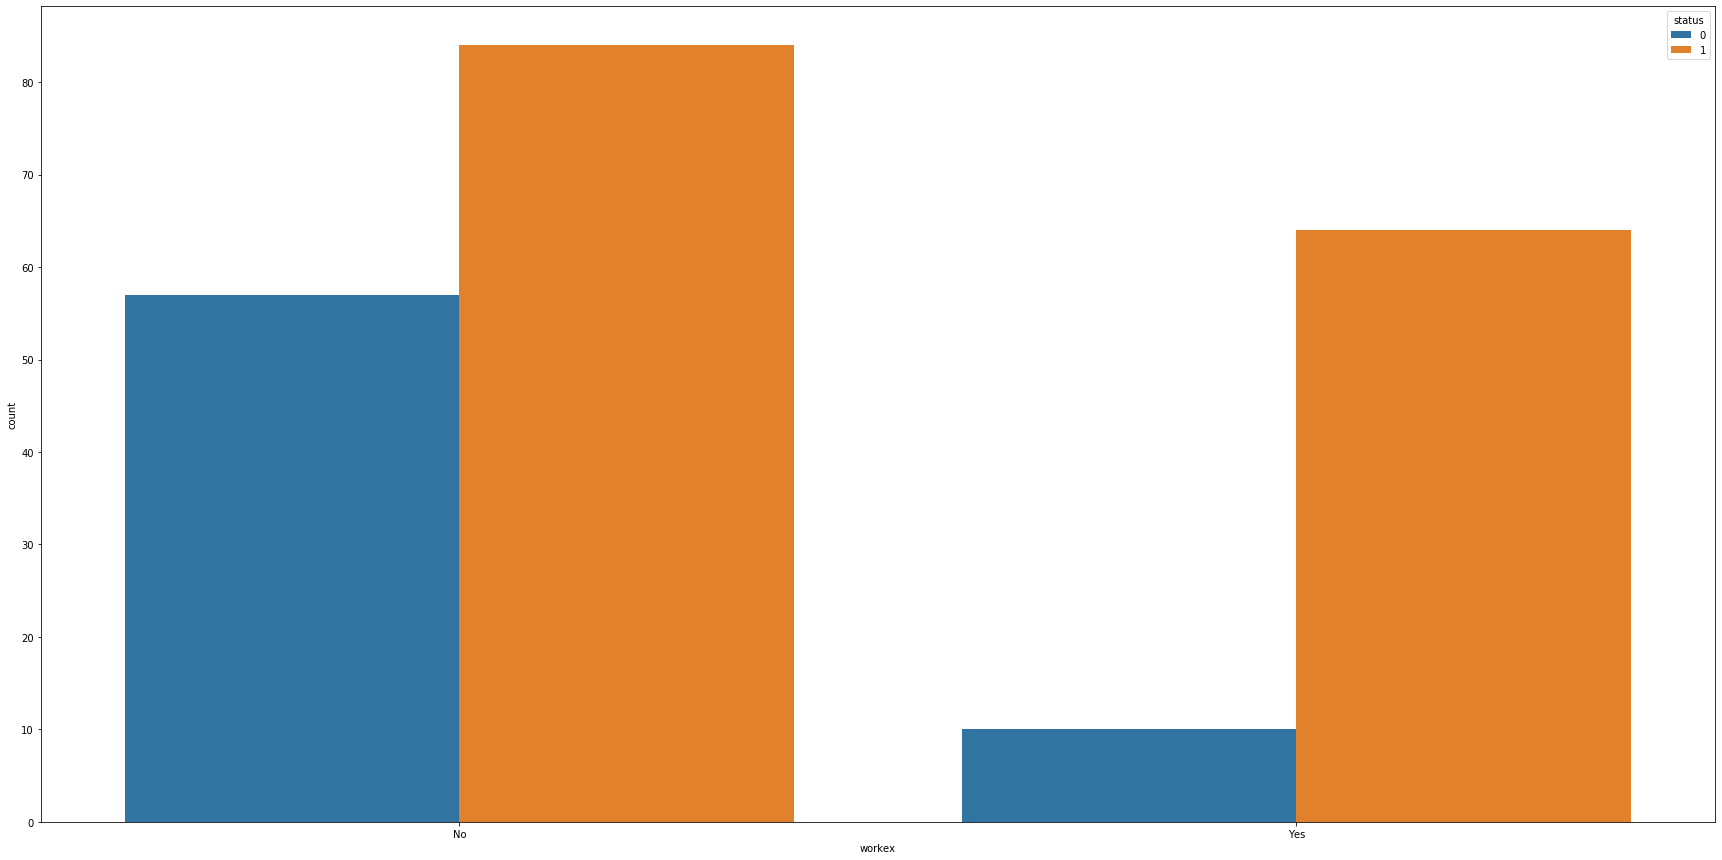

In [46]:
plt.figure(figsize=(30,15))
sns.countplot(x ="workex", data = cr_s, hue ="status")
plt.show()

#### Q1. Which factor most influenced a candidate getting placed?

#### Ans: The MBA percntage, Higher secondary school is also important.

#### Q2. Does percentage matter for one to get placed?

#### Ans: Yes, it matters

In [5]:
cr.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [51]:
cr['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

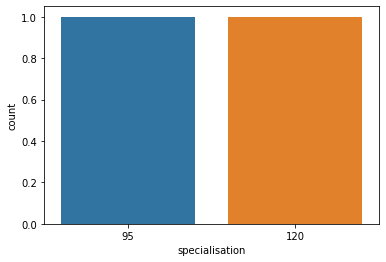

In [52]:
sns.countplot(cr['specialisation'].value_counts())

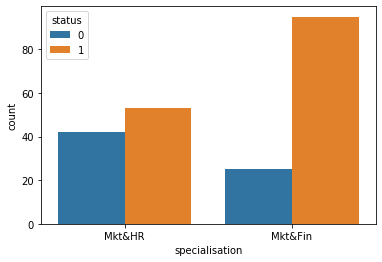

In [55]:
sns.countplot(x = 'specialisation', hue = "status", data = cr_s)

#### Q3. Which degree specialization is much demanded by corporate?

#### Ans: Marketing and Finance

In [56]:
cr_s.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


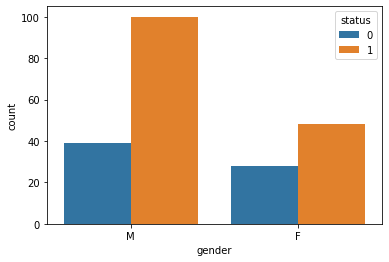

In [57]:
sns.countplot(x = 'gender', hue = "status", data = cr_s)

In [58]:
cr_s['workex']=cr_s['workex'].replace("Yes", 1)
cr_s['workex']=cr_s['workex'].replace("No", 0)

In [59]:
cr_s.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex              int64
etest_p           float64
specialisation     object
mba_p             float64
status              int64
salary            float64
dtype: object

In [ ]:
cr_target=cr_s['ssc_p','hsc_p', 'hsc_b', 'hsc_s','degree_p', 'degree_t', 'workex','etest_p', 'mba_p', 'salary']

In [61]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    cr_s[col] = label_encoder.fit_transform(cr_s[col])
cr_s.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,NaN
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [62]:
dummy_hsc_s=pd.get_dummies(cr_s['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(cr_s['degree_t'], prefix='dummy')


In [73]:
new_cr_s = pd.concat([cr_s,dummy_hsc_s,dummy_degree_t],axis=1)

In [74]:
new_cr_s.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
new_cr_s.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [75]:
new_cr_s.drop(['sl_no','ssc_b','hsc_b', 'status'],axis=1, inplace=True)

In [76]:
new_cr_s.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,0,1,0,1,0,0


In [77]:
from sklearn.model_selection import train_test_split

In [83]:
X = new_cr_s
y = cr_s['status']

In [80]:
X

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,0,91.0,0,74.49,0,1,0,1,0,0
211,1,58.00,60.00,72.00,0,74.0,0,53.62,0,0,1,0,0,1
212,1,67.00,67.00,73.00,1,59.0,0,69.72,0,1,0,1,0,0
213,0,74.00,66.00,58.00,0,70.0,1,60.23,0,1,0,1,0,0


In [84]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)

#### I suggest we use Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [87]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y_pred = lr.predict(X_test)


In [91]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91
